In [1]:
import aptwrapper
import anasyspythontools as apt
from anasyspythontools.export import image_to_DataArray, spectrum_to_Dataset
from anasyspythontools.xarray_utils import create_projected_coords

import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt

# plt.style.use('dark_background')

# Loading files

In [4]:
doc_xz = aptwrapper.read('22.10.04 doc1.axz')
doc_xz.RenderedSpectra['Spectrum 4']

<xarray.Dataset>
Dimensions:              (v: 172)
Coordinates:
    Label                <U10 'Spectrum 4'
    Location.X           float64 -2.056e+03
    Location.Y           float64 1.415e+03
    PulseRate            float64 512.6
    TimeStamp            datetime64[ns] 2022-10-04T15:02:58.666051
    AFMMode              <U7 'Contact'
    AttenuationBase64    float64 0.0573
    BackgroundFileName   <U63 'C:\\Users\\nanoIR\\Desktop\\DATA\\Wouter\\2022...
    BackgroundOption     <U6 'Normal'
    Polarization         <U2 '90'
  * v                    (v) float64 1.45e+03 1.452e+03 ... 1.79e+03 1.792e+03
Data variables:
    IR Phase (Deg)       (v) float64 6.55 -2.259 2.737 ... 7.203 14.26 20.21
    PLL Frequency (kHz)  (v) float64 512.7 512.7 512.7 ... 512.7 512.7 512.7
    IR Amplitude (mV)    (v) float64 1.872 2.009 2.026 ... 0.4191 0.4324 0.5771
    Attenuation          (v) float64 0.0573 0.0573 0.0573 ... 0.0573 0.0573
    Background           (v) float64 0.2462 0.2675 0.26 ... 0.05562 0.03255
Attributes:
    long_name:  IR Amplitude
    units:      mV

In [5]:
doc_xz.HeightMaps['Height 4']

<xarray.DataArray (y: 512, x: 512)>
array([[361.45568848, 359.89547729, 359.08416748, ..., 378.05633545,
        378.61801147, 376.96417236],
       [366.9788208 , 364.85693359, 365.48101807, ..., 385.17089844,
        384.42199707, 384.0163269 ],
       [368.44543457, 367.44689941, 368.13339233, ..., 389.13381958,
        388.2913208 , 384.42199707],
       ...,
       [747.421875  , 751.19763184, 751.01037598, ..., 826.21295166,
        823.37335205, 823.31097412],
       [748.07720947, 747.76513672, 748.54522705, ..., 826.89941406,
        825.93212891, 825.05841064],
       [747.04742432, 748.70129395, 748.20202637, ..., 830.20709229,
        825.86968994, 824.09106445]])
Coordinates: (12/19)
    xpix                          (x) int64 0 1 2 3 4 5 ... 507 508 509 510 511
    ypix                          (y) int64 0 1 2 3 4 5 ... 507 508 509 510 511
    TimeStamp                     datetime64[ns] 2022-10-04T12:49:19.812174900
    Tags.ScanRate                 float64 0.2
    Tags.Setpoint                 float64 0.5547
    Tags.IGain                    float64 16.0
    ...                            ...
    Tags.IRAttenuation            float64 5.73
    Tags.IRPowerMaximizerEnabled  bool True
    Tags.IRPolarization           float64 0.0
    Label                         <U8 'Height 4'
    X                             (y, x) float64 -2.059e+03 ... -2.049e+03
    Y                             (y, x) float64 1.419e+03 ... 1.409e+03
Dimensions without coordinates: y, x

In [6]:
bg = aptwrapper.read('22.10.13 bg1.irb')
bg

<xarray.DataArray (v: 172)>
array([0.20668691, 0.25437588, 0.23492252, 0.19993733, 0.23548878,
       0.24003969, 0.26937814, 0.22047691, 0.23073997, 0.27848061,
       0.26575631, 0.24894149, 0.30306784, 0.27361163, 0.2883448 ,
       0.3090259 , 0.26947784, 0.26704392, 0.27724368, 0.25363214,
       0.25382389, 0.29929497, 0.28927258, 0.27605089, 0.28272769,
       0.30042304, 0.30456845, 0.30004825, 0.21348164, 0.24704069,
       0.29231666, 0.26710612, 0.29512234, 0.28149638, 0.28938092,
       0.28764314, 0.25903489, 0.27997555, 0.30648484, 0.30386438,
       0.30458233, 0.3241935 , 0.31257704, 0.30801195, 0.28982707,
       0.27861808, 0.27550613, 0.29695628, 0.30802798, 0.31744323,
       0.3510519 , 0.34872686, 0.32490227, 0.37681398, 0.30159634,
       0.31096868, 0.354337  , 0.30675902, 0.3278332 , 0.33452956,
       0.333457  , 0.36224406, 0.39143952, 0.35241848, 0.39819682,
       0.41498002, 0.36996376, 0.37751352, 0.38523879, 0.35609102,
       0.37818654, 0.38611115, 0.36299325, 0.39140697, 0.39612733,
       0.36616276, 0.3750985 , 0.36860401, 0.34632159, 0.37431583,
       0.36677934, 0.35044345, 0.37101643, 0.30306517, 0.32608817,
       0.343108  , 0.30517588, 0.29519259, 0.33025812, 0.32725826,
       0.33742664, 0.38009419, 0.32334509, 0.36175982, 0.39827855,
       0.36863648, 0.36044941, 0.361373  , 0.31818433, 0.34321076,
       0.38220278, 0.26187219, 0.33188173, 0.42844064, 0.41188234,
       0.44636713, 0.3618281 , 0.3872055 , 0.42782565, 0.38738937,
       0.40025684, 0.43602596, 0.38788233, 0.40658883, 0.43949109,
       0.39226765, 0.40194202, 0.28086947, 0.34971744, 0.39828646,
       0.41663086, 0.41345013, 0.44966726, 0.4194243 , 0.41064674,
       0.30221352, 0.37472637, 0.31638978, 0.33256427, 0.34711337,
       0.34109806, 0.38091685, 0.35233195, 0.33057488, 0.32950502,
       0.38186027, 0.34946739, 0.35328758, 0.31708818, 0.29340897,
       0.31077835, 0.29089763, 0.2567849 , 0.30802327, 0.2949748 ,
       0.27751903, 0.29383213, 0.26365493, 0.2406083 , 0.2371949 ,
       0.21899626, 0.22398155, 0.23873196, 0.19942011, 0.20581169,
       0.20777215, 0.17878202, 0.17305458, 0.167451  , 0.14270782,
       0.14500375, 0.11611052, 0.13135933, 0.13485279, 0.12905651,
       0.10453136, 0.10563393, 0.08924764, 0.07243568, 0.06848481,
       0.05682945, 0.04450059])
Coordinates:
  * v                (v) float64 1.45e+03 1.452e+03 ... 1.79e+03 1.792e+03
    AttenuatorPower  object 100
Attributes:
    long_name:  Laser power
    units:      mW

# Video plotting

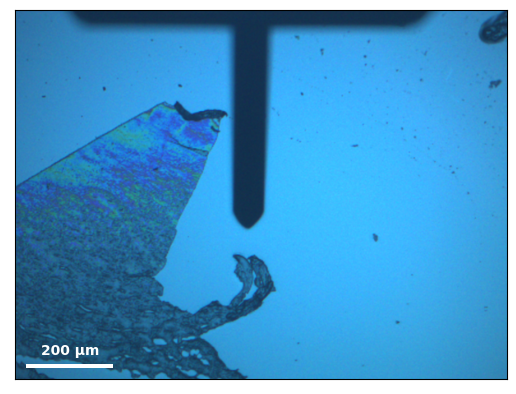

In [7]:
aptwrapper.plot_map(doc_xz.Images['Video 1'])

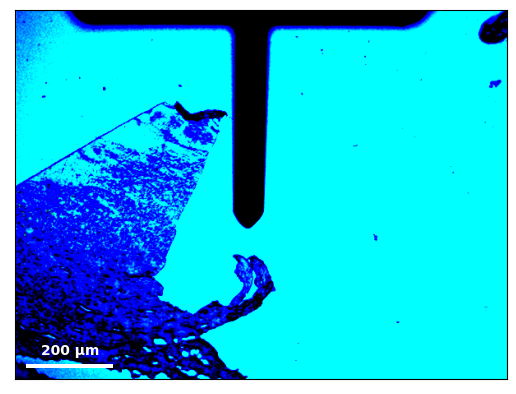

In [8]:
aptwrapper.plot_map(doc_xz.Images['Video 1'], contrast=(.4,10))

# Spectrum processing

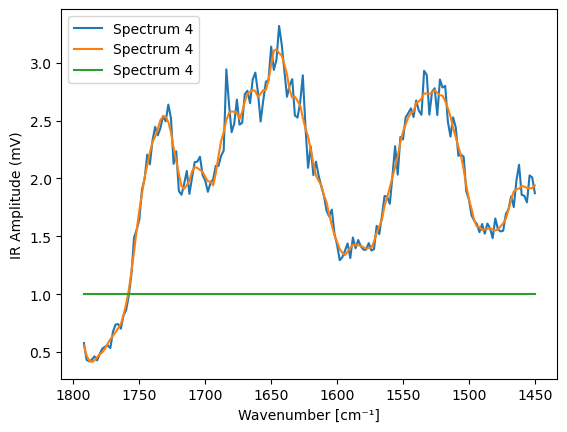

In [9]:
from typing import Union
from scipy.signal import savgol_filter

aptwrapper.plot_spectrum(doc_xz.RenderedSpectra['Spectrum 4'])
aptwrapper.plot_spectrum(aptwrapper.savgol(doc_xz.RenderedSpectra['Spectrum 4'], 11, 3))
aptwrapper.plot_spectrum(doc_xz.RenderedSpectra['Spectrum 4']/doc_xz.RenderedSpectra['Spectrum 4'])
plt.legend()

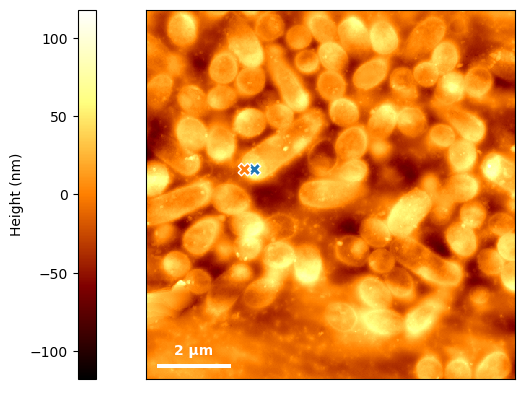

In [10]:
aptwrapper.plot_map(doc_xz.HeightMaps['Height 7'])
aptwrapper.mark_location(doc_xz.RenderedSpectra['Spectrum 4'])
aptwrapper.mark_location(doc_xz.RenderedSpectra['Spectrum 4'], doc_xz.HeightMaps['Height 7'], [1e-3, 0])

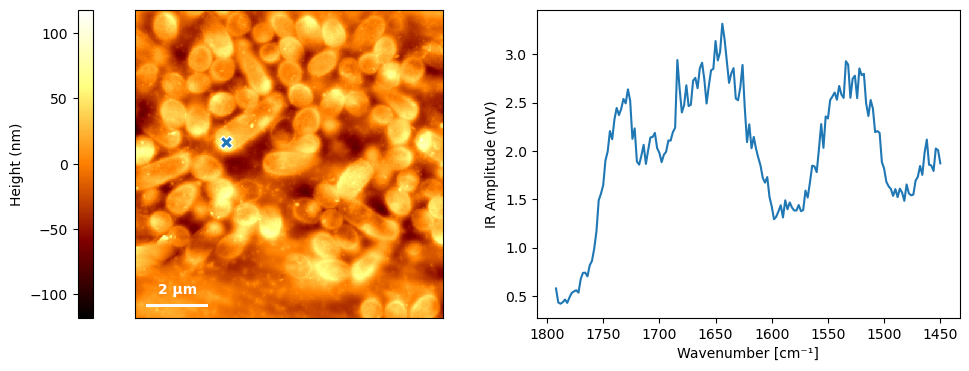

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

aptwrapper.plot_map(doc_xz.HeightMaps['Height 7'], ax[0])
aptwrapper.plot_spectrum(doc_xz.RenderedSpectra['Spectrum 4'], ax[1], ax[0])

# Plotting maps

In [12]:
#aptwrapper.plot_all_maps(doc_xz)

# Drift compensation

## Transformations

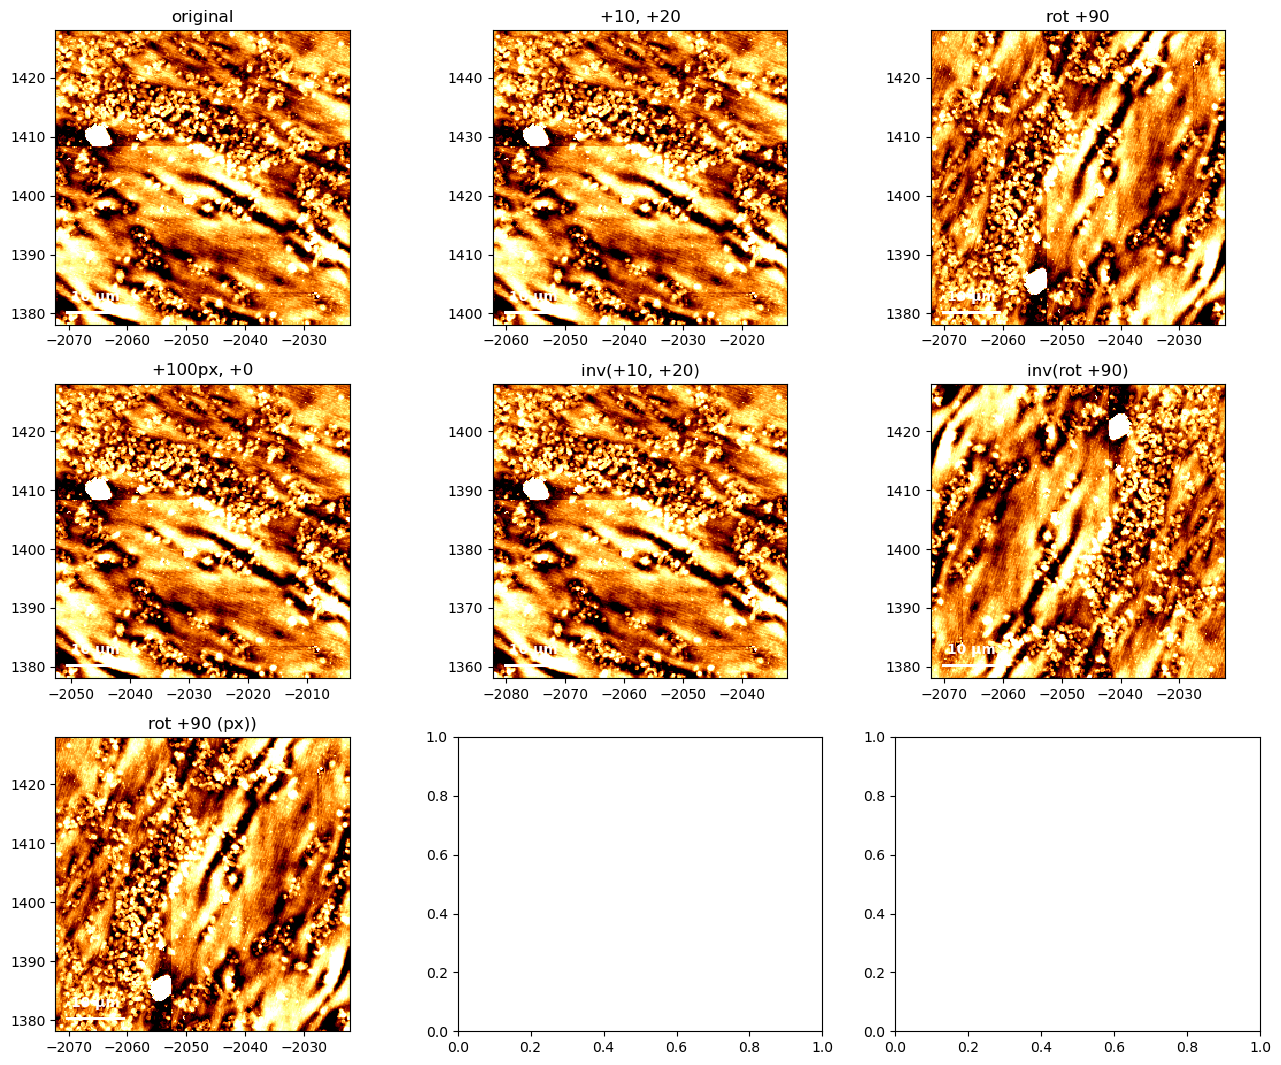

In [13]:
hmap = doc_xz.HeightMaps['Height 2']
fig, ax = plt.subplots(3,3, figsize=(16,13))

plots = [
    ('original',      hmap),
    ('+10, +20',      aptwrapper.translate(hmap, 10,20)),
    ('rot +90',       aptwrapper.rotate(hmap, 90)),
    ('+100px, +0',    aptwrapper.translate(hmap, 100., 0, pixels=True)),
    ('inv(+10, +20)', aptwrapper.translate(hmap, 10,20, inverted=True)),
    ('inv(rot +90)',  aptwrapper.rotate(hmap,  90, inverted=True)),
    ('rot +90 (px))',  aptwrapper.rotate(hmap,  90, pixels=True)),
]

for a, (title, hmapt) in zip(ax.flatten(), plots):
    aptwrapper.plot_map(hmapt, a, vmax=50, ticks=True, colorbar=False)
    a.set_title(title)

def asserts():

    # Automated assesment of correctness
    assert np.all(plots[1][1].data == hmap.data)
    assert np.all(plots[1][1].X == hmap.X+10)
    assert np.all(plots[1][1].Y == hmap.Y+20)

    assert np.all(plots[2][1].data == hmap.data)
    assert np.all(plots[2][1].X.data == np.rot90(hmap.X.data, k=3))
    assert np.all(plots[2][1].Y.data == np.rot90(hmap.Y.data, k=3))

    assert np.all(plots[3][1].data == hmap.data)
    assert np.all(plots[3][1].X == hmap.X + hmap.X.diff('x')[0,0].item()*100)
    assert np.all(plots[3][1].Y == hmap.Y)

    assert np.all(plots[4][1].data == hmap.data)
    assert np.all(plots[4][1].X == hmap.X-10)
    assert np.all(plots[4][1].Y == hmap.Y-20)

    assert np.all(plots[5][1].data == hmap.data)
    assert np.all(plots[5][1].X.data == np.rot90(hmap.X.data))
    assert np.all(plots[5][1].Y.data == np.rot90(hmap.Y.data))

asserts()

None

## Simple drift measurement

In [14]:
aptwrapper.pixel_size_xy(doc_xz.HeightMaps['Height 4'])

array([0.01953125, 0.01953125])

drift = [-0.13671875  0.1171875 ] um


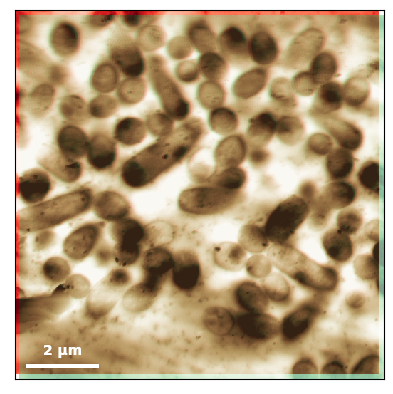

In [15]:
from typing import Tuple, Union


d = aptwrapper.calculate_drift(doc_xz.HeightMaps['Height 4'], doc_xz.HeightMaps['Height 5'])
print('drift =', d, 'um')

aptwrapper.plot_map(doc_xz.HeightMaps['Height 4'], cmap='Reds', vmax=50, colorbar=False)
aptwrapper.plot_map(
    aptwrapper.translate(doc_xz.HeightMaps['Height 5'], d[1], d[0]),
    cmap='Greens', alpha=.5, vmax=50, colorbar=False
)

In [16]:
aptwrapper.calculate_drift_speed(doc_xz.HeightMaps['Height 4'], doc_xz.HeightMaps['Height 5'])

array([-5.30516190e-05,  4.54728163e-05])

## Map interpolation

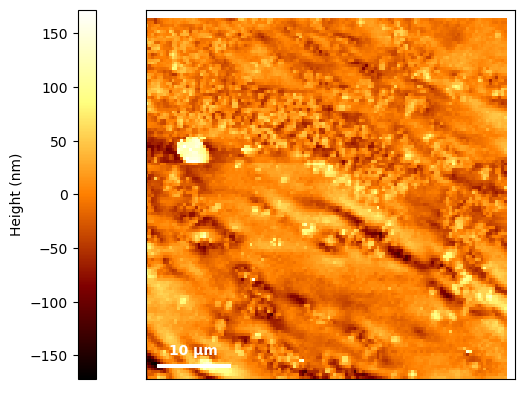

In [17]:
assert np.all(hmap.data - aptwrapper.new_interp(hmap, hmap.X.data, hmap.Y.data).data ==0)

x = hmap.X.to_numpy()[::2, ::2]+1
y = hmap.Y.to_numpy()[::2, ::2]+1
aptwrapper.plot_map(aptwrapper.new_interp(hmap, x, y))

## Calculated maps

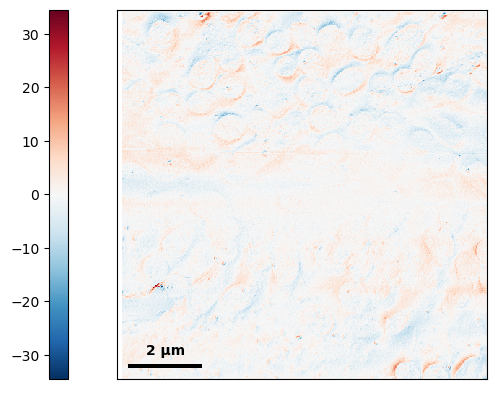

In [18]:
aptwrapper.plot_map(
    aptwrapper.bin_op(
        aptwrapper.default_flatten(doc_xz.HeightMaps['Height 5']), 
        aptwrapper.default_flatten(doc_xz.HeightMaps['Height 6']),
        aptwrapper.default_flatten(doc_xz.HeightMaps['Height 5']), 
        # aptwrapper.default_flatten(doc_xz.HeightMaps['Height 5']), 
        aptwrapper.default_flatten(doc_xz.HeightMaps['Height 6']),
        lambda x,y: x-y
    ),
    sb_color='k')

# Image registration

Skew images based on drift

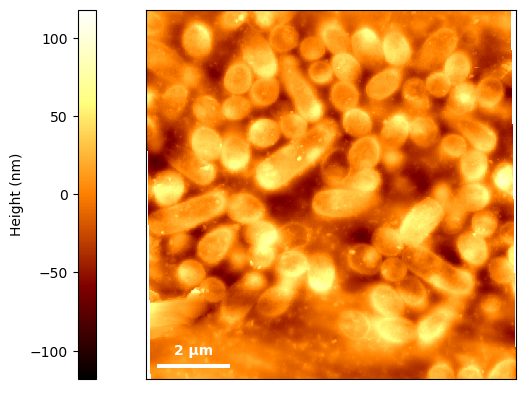

In [19]:
h1 = doc_xz.HeightMaps['Height 4']
h1 = aptwrapper.subtract_lines(h1)
ds = aptwrapper.calculate_drift_speed(doc_xz.HeightMaps['Height 4'], doc_xz.HeightMaps['Height 5'])
h1skewed = aptwrapper.apply_skew(h1, ds)
aptwrapper.plot_map(h1skewed)

Define inner bounding box of skewed image

(-2053.982966511294, 1414.29817888468, 9.845186603542516)

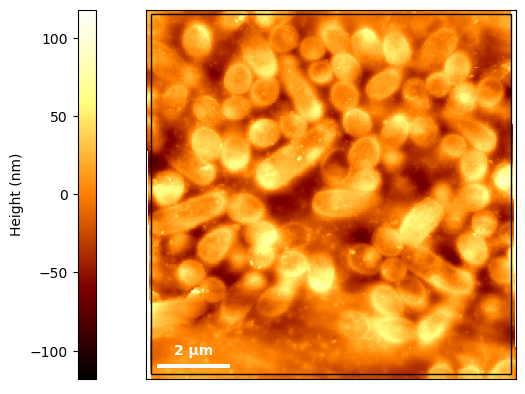

In [20]:
from matplotlib.patches import Rectangle

aptwrapper.inner_bounding_box(h1skewed, plot=True)

Interpolation

False

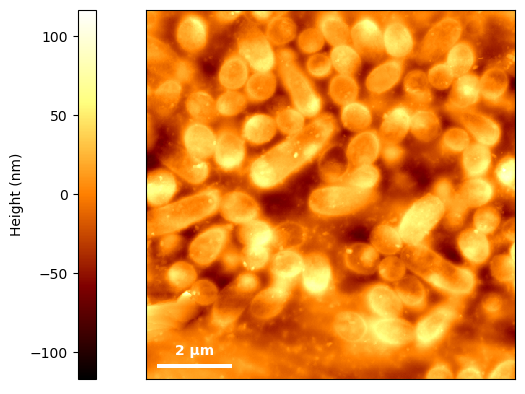

In [21]:
cx, cy, d = aptwrapper.inner_bounding_box(h1skewed, plot=False)

def cd2grid(cx, cy, d):
    d = .99*d

    x = np.linspace(cx-d/2, cx+d/2, 512)
    y = np.linspace(cy-d/2, cy+d/2, 512)
    x,y = np.meshgrid(x, y)

    return x, y

h1_ip = aptwrapper.new_interp(h1skewed, *cd2grid(cx, cy, d))
aptwrapper.plot_map(h1_ip)
h1_ip.isnull().any().item()

## Feature-based registration (ORB)

et params
[[   0.89442719    0.4472136  -241.16357357]
 [  -0.4472136     0.89442719  216.92717818]
 [   0.            0.            1.        ]]


Text(0.5, 1.0, 'Correct transformation')

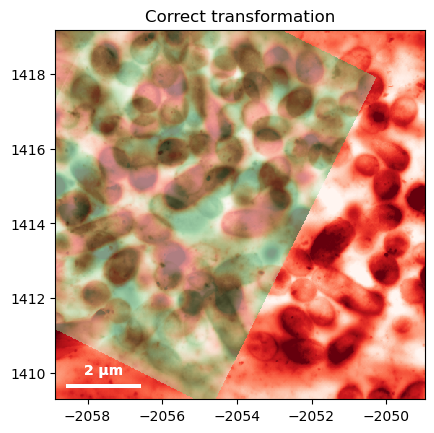

In [22]:
doc_yz = aptwrapper.read('22.10.04 doc2.axz')

drift=True
h1 = aptwrapper.subtract_lines(doc_xz.HeightMaps['Height 4'])
h1_drift = aptwrapper.calculate_drift_speed(doc_xz.HeightMaps['Height 4'], doc_xz.HeightMaps['Height 5'])
h1_skewed = aptwrapper.apply_skew(aptwrapper.default_flatten(h1), h1_drift if not drift else [0, 0])
cx, cy, d = aptwrapper.inner_bounding_box(h1_skewed, plot=False)
h1_ip = aptwrapper.new_interp(h1_skewed, *cd2grid(cx, cy, d))

h2 = aptwrapper.subtract_lines(doc_yz.HeightMaps['Height 5'])
h2_drift = aptwrapper.calculate_drift_speed(doc_yz.HeightMaps['Height 5'], doc_yz.HeightMaps['Height 6'])
h2_skewed = aptwrapper.apply_skew(aptwrapper.default_flatten(h2), h2_drift if not drift else [0, 0])
cx, cy, d = aptwrapper.inner_bounding_box(h2_skewed, plot=False)
h2_ip = aptwrapper.new_interp(h2_skewed, *cd2grid(cx, cy, d))
h2_ip = h1_ip.copy(data=np.rot90(h2_ip, k=3))

ET = aptwrapper.register_orb(h1_ip.data, h2_ip.data)
print('et params')
print(ET.params)

from skimage.transform import warp
aptwrapper.plot_map(h1_ip, cmap='Reds', vmax=50, colorbar=False, ticks=True)
warper = lambda map: warp(map, ET.inverse, cval=np.nan)
aptwrapper.plot_map(xr.apply_ufunc(warper, h2_ip),cmap='Greens', alpha=.5, vmax=50, colorbar=False, ticks=True)
plt.title('Correct transformation')

(-2063.5312216802085,
 -2048.964794921875,
 1409.0621661793075,
 1422.3444099656567)

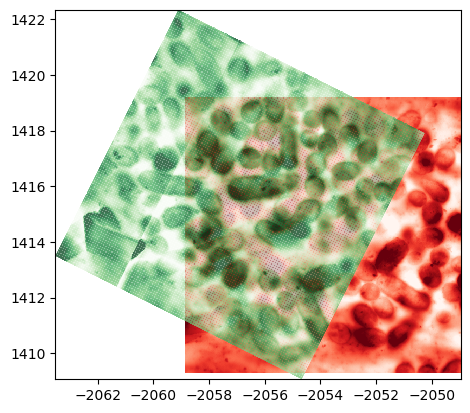

In [23]:
def apply_orb(im, mat):
    mat = np.copy(mat)

    # skimg uses a different coordinate convention in which xy <> yx, so I need to:
    # # 1: Invert the rotation
    mat[0:2, 0:2] = np.linalg.inv(mat[0:2, 0:2])

    # # 2: flip x and y drift (also apply pixel scaling)
    pixel_size_x = np.abs(h2_ip.X.diff('x')[0,0]).item()
    pixel_size_y = np.abs(h2_ip.Y.diff('y')[0,0]).item()

    d0, d1 = mat[0,2], mat[1,2]
    mat[0, 2] = pixel_size_x * d1
    mat[1, 2] = pixel_size_y * d0

    return aptwrapper.apply_warp(im, mat, origin='lower left')

aptwrapper.plot_map(h1_ip, cmap='Reds', vmax=50, colorbar=False, ticks=True)
aptwrapper.plot_map(apply_orb(h2_ip, ET.params), cmap='Greens', alpha=.5, vmax=50, colorbar=False, ticks=True)
plt.gca().axis('on')

## TODO: ECC maximisation

In [24]:
import cv2

def register_ecc(im1, im2, mask=None):
    if mask is None:
        x = np.arange(im2.shape[0])
        x, y = np.meshgrid(x, x)
        mask = y < 300

    nanmask = np.isnan(im2)
    im1 = np.nan_to_num(im1)
    im2 = np.nan_to_num(im2)

    number_of_iterations = int(1e4)
    termination_eps = -1e15
    warp_mode = cv2.MOTION_AFFINE
    criteria = (
        cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
        number_of_iterations,
        termination_eps
    )

    warp_matrix = np.eye(2, 3, dtype=np.float32)

    (_, warp_matrix) = cv2.findTransformECC(
        im1.astype(np.float32), im2.astype(np.float32), warp_matrix,
        warp_mode, criteria, mask.astype(np.uint8), int(5)
    )

    im2_ = cv2.warpAffine(
        np.where(nanmask, np.nan, im2), warp_matrix, im2.shape, flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP
    )
    display(warp_matrix)
    return warp_matrix

ecc_mat = register_ecc(h1_ip, h2_ip)

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x282f3f940>
Traceback (most recent call last):
  File "/Users/u0147590/mambaforge/envs/switch-mamba/lib/python3.9/site-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


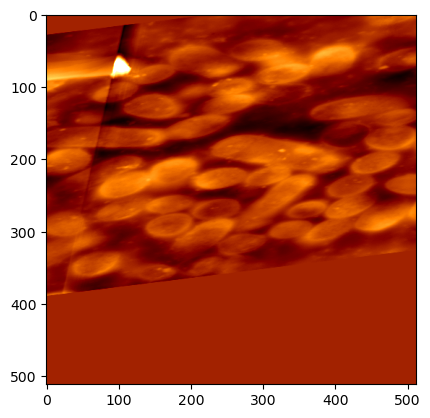

In [ ]:
fw_matrix = np.copy(ecc_mat)

plt.imshow(
    cv2.warpAffine(h2_ip.data, fw_matrix, h2_ip.data.shape, flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP),
    cmap='afmhot', vmax=200
)